In [2]:
import pandas as pd
from PIL import Image, ImageOps
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
# Caminho para o diretório de imagens e para o arquivo CSV
image_dir = 'F:/6º Periodo/PAI/Trabalho-de-PAI/dataset'
csv_path = 'F:/6º Periodo/PAI/Trabalho-de-PAI/classifications.csv'

In [4]:
df = pd.read_csv(csv_path)
df

,image_id,image_filename,image_doi,cell_id,bethesda_system,nucleus_x,nucleus_y
0,400,9ae8a4edde40219bad6303cebc672ee4.png,10.6084/m9.figshare.12230906,1,SCC,792,462
1,400,9ae8a4edde40219bad6303cebc672ee4.png,10.6084/m9.figshare.12230906,2,SCC,601,678
2,400,9ae8a4edde40219bad6303cebc672ee4.png,10.6084/m9.figshare.12230906,3,SCC,363,467
3,400,9ae8a4edde40219bad6303cebc672ee4.png,10.6084/m9.figshare.12230906,4,SCC,599,437
4,400,9ae8a4edde40219bad6303cebc672ee4.png,10.6084/m9.figshare.12230906,5,Negative for intraepithelial lesion,1186,450
...,...,...,...,...,...,...,...
11529,1,be340ee72689dfe3f8dc9c24de6127f4.png,10.6084/m9.figshare.12229511,11530,LSIL,618,407
11530,1,be340ee72689dfe3f8dc9c24de6127f4.png,10.6084/m9.figshare.12229511,11531,LSIL,607,374
11531,1,be340ee72689dfe3f8dc9c24de6127f4.png,10.6084/m9.figshare.12229511,11532,LSIL,707,251
11532,1,be340ee72689dfe3f8dc9c24de6127f4.png,10.6084/m9.figshare.12229511,11533,LSIL,579,246


In [5]:
df_filtrado = df[df['image_filename'].isin(os.listdir('F:/6º Periodo/PAI/Trabalho-de-PAI/dataset'))]
df_filtrado.to_csv("filtered_file.csv", index=False)
df_filtrado

,image_id,image_filename,image_doi,cell_id,bethesda_system,nucleus_x,nucleus_y
526,393,363b6b00d925e5c52694b8f7b678c53b.png,10.6084/m9.figshare.12230885,527,LSIL,998,890
527,393,363b6b00d925e5c52694b8f7b678c53b.png,10.6084/m9.figshare.12230885,528,LSIL,645,600
528,393,363b6b00d925e5c52694b8f7b678c53b.png,10.6084/m9.figshare.12230885,529,LSIL,609,585
529,393,363b6b00d925e5c52694b8f7b678c53b.png,10.6084/m9.figshare.12230885,530,Negative for intraepithelial lesion,393,140
530,393,363b6b00d925e5c52694b8f7b678c53b.png,10.6084/m9.figshare.12230885,531,Negative for intraepithelial lesion,348,207
...,...,...,...,...,...,...,...
11487,2,9d0f43b29d78f673e9caf77928b4af3c.png,10.6084/m9.figshare.12229520,11488,ASC-US,671,244
11488,2,9d0f43b29d78f673e9caf77928b4af3c.png,10.6084/m9.figshare.12229520,11489,ASC-US,602,274
11489,2,9d0f43b29d78f673e9caf77928b4af3c.png,10.6084/m9.figshare.12229520,11490,ASC-US,605,252
11490,2,9d0f43b29d78f673e9caf77928b4af3c.png,10.6084/m9.figshare.12229520,11491,ASC-US,550,319


In [6]:
def crop_subimage_with_padding(image, x, y, size=100):
    half_size = size // 2

    # Coordenadas para o corte
    left = x - half_size
    upper = y - half_size
    right = x + half_size
    lower = y + half_size

    # Verificar se as coordenadas estão fora dos limites da imagem e ajustar com padding
    padding_left = max(0, -left)
    padding_top = max(0, -upper)
    padding_right = max(0, right - image.width)
    padding_bottom = max(0, lower - image.height)

    # Ajustar coordenadas de corte para estarem dentro dos limites da imagem
    left = max(0, left)
    upper = max(0, upper)
    right = min(image.width, right)
    lower = min(image.height, lower)

    # Recortar a imagem
    cropped_image = image.crop((left, upper, right, lower))

    # Adicionar padding se necessário
    if padding_left > 0 or padding_top > 0 or padding_right > 0 or padding_bottom > 0:
        cropped_image = ImageOps.expand(cropped_image, border=(padding_left, padding_top, padding_right, padding_bottom), fill=0)

    # Garantir que a subimagem tenha exatamente 100x100 pixels
    cropped_image = cropped_image.resize((size, size))
    
    return cropped_image

In [24]:
# Diretório para salvar as subimagens
subimage_dir = 'F:/6º Periodo/PAI/Trabalho-de-PAI/sub-imagens/'
os.makedirs(subimage_dir, exist_ok=True)

In [25]:
for index, row in df_filtrado.iterrows():
    try:
        filename = row['image_filename']
        x, y = int(row['nucleus_x']), int(row['nucleus_y'])
        classe_celula = row['bethesda_system']
        
        # Caminho completo para a imagem
        image_path = os.path.join(image_dir, filename)
        
        # Carregar a imagem
        image = Image.open(image_path).convert('L')
        # Recortar a subimagem
        subimage = crop_subimage_with_padding(image, x, y)
        
        # Salvar a subimagem
        subimage_filename = f"{row['cell_id']}.png"
        subimage_path = os.path.join(subimage_dir, classe_celula,subimage_filename)
        subimage.save(subimage_path)

        # print(f'Subimagem salva em {subimage_path}')
    except:
        pass
    

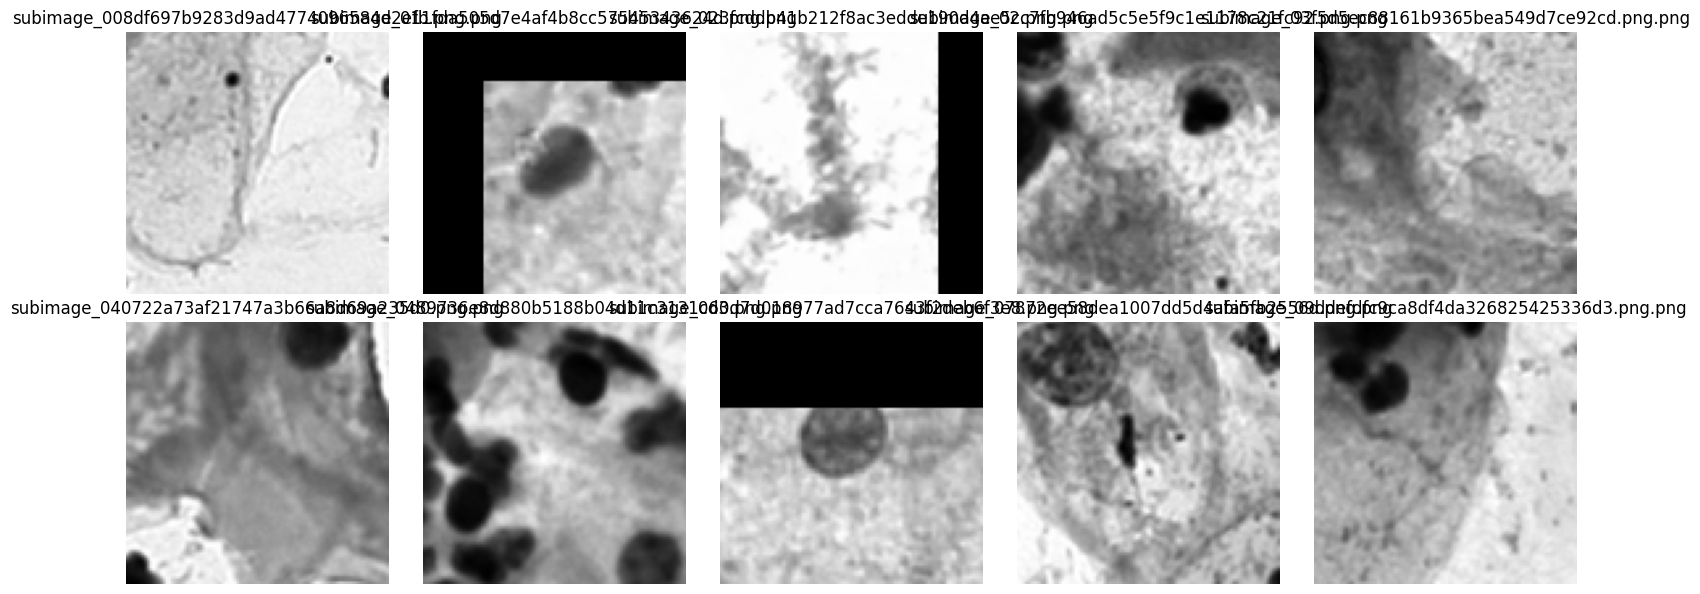

In [50]:
# Verificar algumas subimagens geradas
# Alterar a seleção de subimagens exibidas modificando os índices abaixo
subimages = os.listdir(subimage_dir)[:10]  # Alterar aqui para selecionar outras subimagens

# Exibir as subimagens em 2 linhas e 5 colunas
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for ax, subimage_filename in zip(axes.flatten(), subimages):
    subimage_path = os.path.join(subimage_dir, subimage_filename)
    subimage = Image.open(subimage_path)
    ax.imshow(subimage, cmap='gray')
    ax.set_title(subimage_filename)
    ax.axis('off')

plt.tight_layout()
plt.show()